<a href="https://colab.research.google.com/github/SAGARGAUD01/AI-Driven-Media-Investment-Plan-/blob/main/Dual_Delight_AIMediaInvest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %pip install pandas==1.3.3
# %pip install scikit-learn==0.24.2
# %pip install matplotlib==3.4.3
# %pip install seaborn==0.11.2

#### Loading the data from the dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

#### Reading the data from files in both the folders and combining them

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

folder1 = 'Dataset 1/'
folder2 = 'Dataset 2/'

google_ads_file = 'googleads-performance.csv'
meta_ads_file = 'metaads-performance.csv'
microsoft_ads_file = 'microsoftads-performance.csv'
website_landings_file = 'website-landings.csv'

google_ads_df1 = pd.read_csv(folder1 + google_ads_file)
meta_ads_df1 = pd.read_csv(folder1 + meta_ads_file)
microsoft_ads_df1 = pd.read_csv(folder1 + microsoft_ads_file)
website_landings_df1 = pd.read_csv(folder1 + website_landings_file)

google_ads_df2 = pd.read_csv(folder2 + google_ads_file)
meta_ads_df2 = pd.read_csv(folder2 + meta_ads_file)
microsoft_ads_df2 = pd.read_csv(folder2 + microsoft_ads_file)
website_landings_df2 = pd.read_csv(folder2 + website_landings_file)

google_ads_df = pd.concat([google_ads_df1, google_ads_df2], ignore_index=True)
meta_ads_df = pd.concat([meta_ads_df1, meta_ads_df2], ignore_index=True)
microsoft_ads_df = pd.concat([microsoft_ads_df1, microsoft_ads_df2], ignore_index=True)
website_landings_df = pd.concat([website_landings_df1, website_landings_df2], ignore_index=True)

print("Google Ads DataFrame:")
print(google_ads_df.head())

print("\nMeta Ads DataFrame:")
print(meta_ads_df.head())

print("\nMicrosoft Ads DataFrame:")
print(microsoft_ads_df.head())

print("\nWebsite Landings DataFrame:")
print(website_landings_df.head())


Google Ads DataFrame:
         Date    Campaign type  Impressions  Clicks    Cost  Conversions  \
0  2024-01-01    Cross-network     143669.0   896.0   656.3          6.5   
1  2024-01-01  Display Network          3.0     0.0     0.0          0.0   
2  2024-01-01   Search Network       3701.0   251.0   496.5          4.5   
3  2024-01-01          YouTube      36211.0     8.0   115.2          0.0   
4  2024-01-02    Cross-network     183496.0  1172.0  1525.0          8.8   

   Revenue  
0   1410.3  
1      0.0  
2    576.4  
3      0.0  
4   3565.7  

Meta Ads DataFrame:
         Date  Impressions    Reach   Cost  Clicks  Conversions  Revenue
0  2024-01-01      36034.0  27263.0  209.1   608.0          4.0    158.2
1  2024-01-02      30804.0  22648.0  204.9   516.0         11.0   1412.8
2  2024-01-03      26372.0  18947.0  198.7   429.0          4.0    371.5
3  2024-01-04      17354.0  11436.0  131.2   324.0          4.0      0.0
4  2024-01-05      12036.0   7921.0  114.0   224.0       

In [ ]:
def preprocess_ads_data(df, platform):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df['Platform'] = platform
    df.fillna(0, inplace=True)
    return df

In [ ]:
google_ads_df = preprocess_ads_data(google_ads_df, 'Google Ads')
meta_ads_df = preprocess_ads_data(meta_ads_df, 'Meta Ads')
microsoft_ads_df = preprocess_ads_data(microsoft_ads_df, 'Microsoft Ads')

In [ ]:
website_landings_df['Website Landing Time'] = pd.to_datetime(website_landings_df['Website Landing Time'], format='%Y-%m-%d %H:%M:%S')
website_landings_df['Is Converted'] = website_landings_df['Is Converted'].astype(int)

In [ ]:
ads_data = pd.concat([google_ads_df, meta_ads_df, microsoft_ads_df], axis=0)

#### Overview of the data

In [ ]:
ads_data.tail()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,Platform,Reach
1080,2024-06-28,Shopping,15266.0,229.0,129.9,8.0,2522.0,Microsoft Ads,NaN
1081,2024-06-29,Search & content,365.0,87.0,133.7,15.0,4178.8,Microsoft Ads,NaN
1082,2024-06-29,Shopping,14916.0,247.0,129.4,10.0,1239.9,Microsoft Ads,NaN
1083,2024-06-30,Search & content,303.0,69.0,99.2,11.0,1721.7,Microsoft Ads,NaN
1084,2024-06-30,Shopping,11646.0,186.0,94.3,6.0,826.3,Microsoft Ads,NaN


In [ ]:
ads_data.describe()

,Date,Impressions,Clicks,Cost,Conversions,Revenue,Reach
count,2633,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,364.000000
mean,2024-03-30 03:18:31.583744768,59216.750855,542.647550,618.769464,23.954880,4134.103304,11158.016484
min,2024-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,4587.000000
25%,2024-02-14 00:00:00,5365.000000,65.000000,61.400000,0.100000,4.000000,7990.750000
50%,2024-03-29 00:00:00,14336.000000,245.000000,136.400000,9.000000,1258.600000,10669.000000
75%,2024-05-14 00:00:00,46431.000000,592.000000,818.500000,30.000000,6132.800000,13515.750000
max,2024-06-30 00:00:00,698237.000000,13429.000000,6218.300000,213.900000,33528.200000,27263.000000
std,NaN,108238.102094,796.145894,977.778980,36.429305,5938.394958,3908.612072


### EDA: Analyze Customer Journey and Ad Performance

#### Plotting Impressions vs. Conversions for each platform

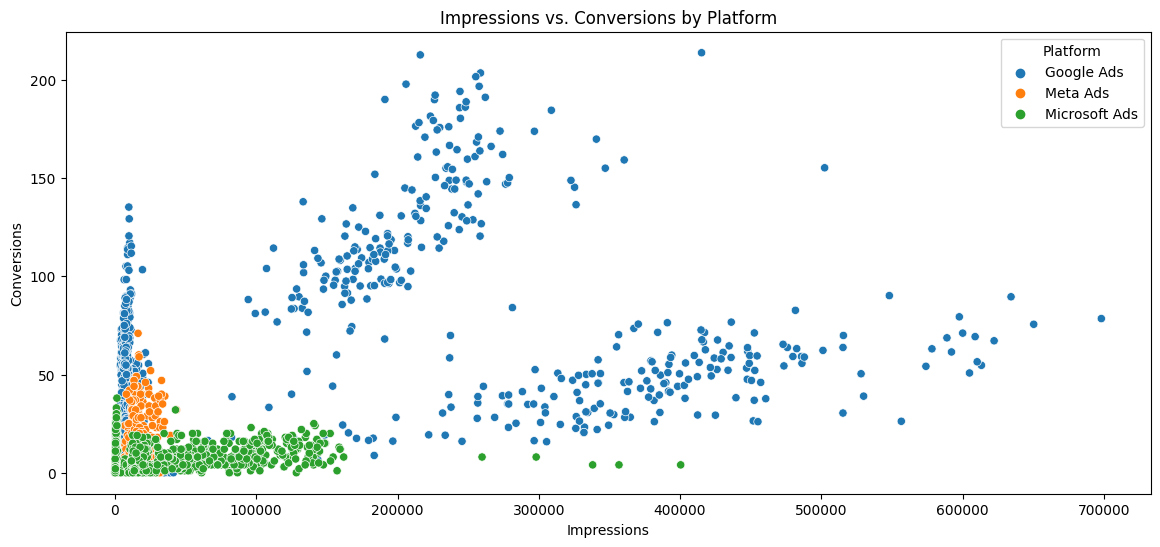

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=ads_data, x='Impressions', y='Conversions', hue='Platform')
plt.title('Impressions vs. Conversions by Platform')
plt.show()

#### Plotting Cost vs. Revenue for each platform

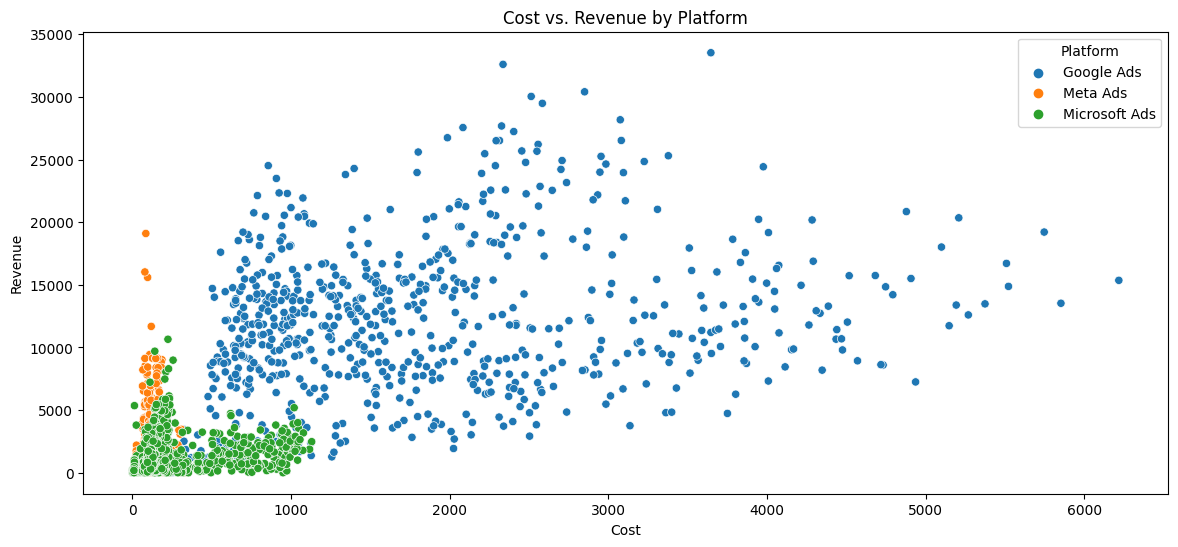

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=ads_data, x='Cost', y='Revenue', hue='Platform')
plt.title('Cost vs. Revenue by Platform')
plt.show()

#### Conversion Rate by Source

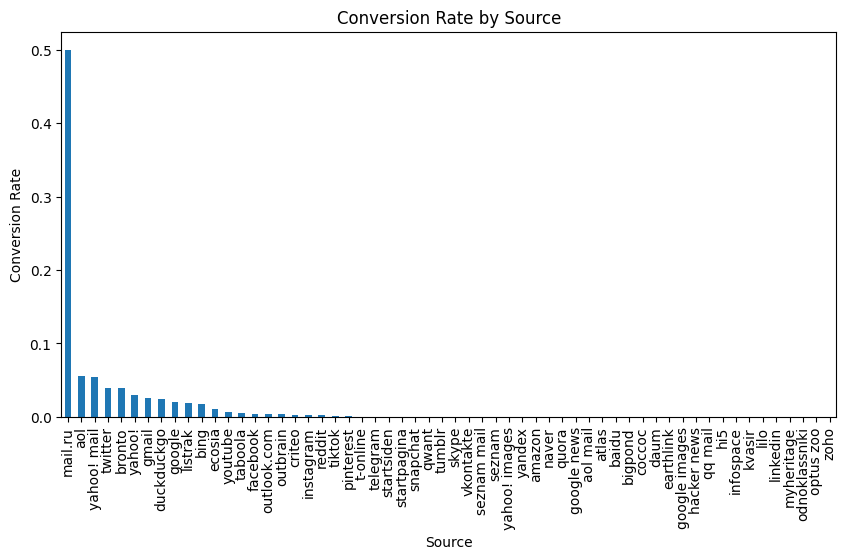

In [ ]:
conversion_rate_by_source = website_landings_df.groupby('Source')['Is Converted'].mean().sort_values(ascending=False)
conversion_rate_by_source.plot(kind='bar', figsize=(10, 5), title='Conversion Rate by Source')
plt.ylabel('Conversion Rate')
plt.show()

#### Conversion Rate by Channel

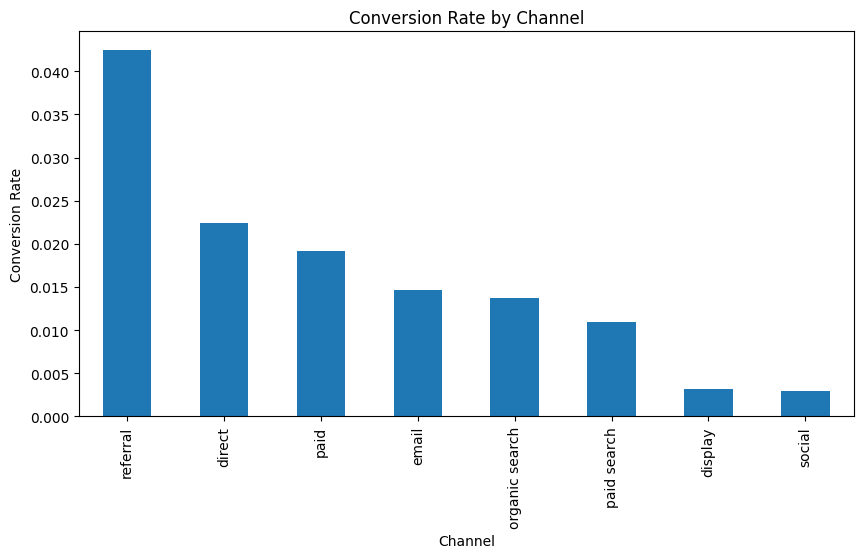

In [ ]:
conversion_rate_by_channel = website_landings_df.groupby('Channel')['Is Converted'].mean().sort_values(ascending=False)
conversion_rate_by_channel.plot(kind='bar', figsize=(10, 5), title='Conversion Rate by Channel')
plt.ylabel('Conversion Rate')
plt.show()

##### One-Hot Encode categorical columns - just for HeatMap

In [ ]:
df = pd.get_dummies(ads_data, columns=['Campaign type', 'Platform'])

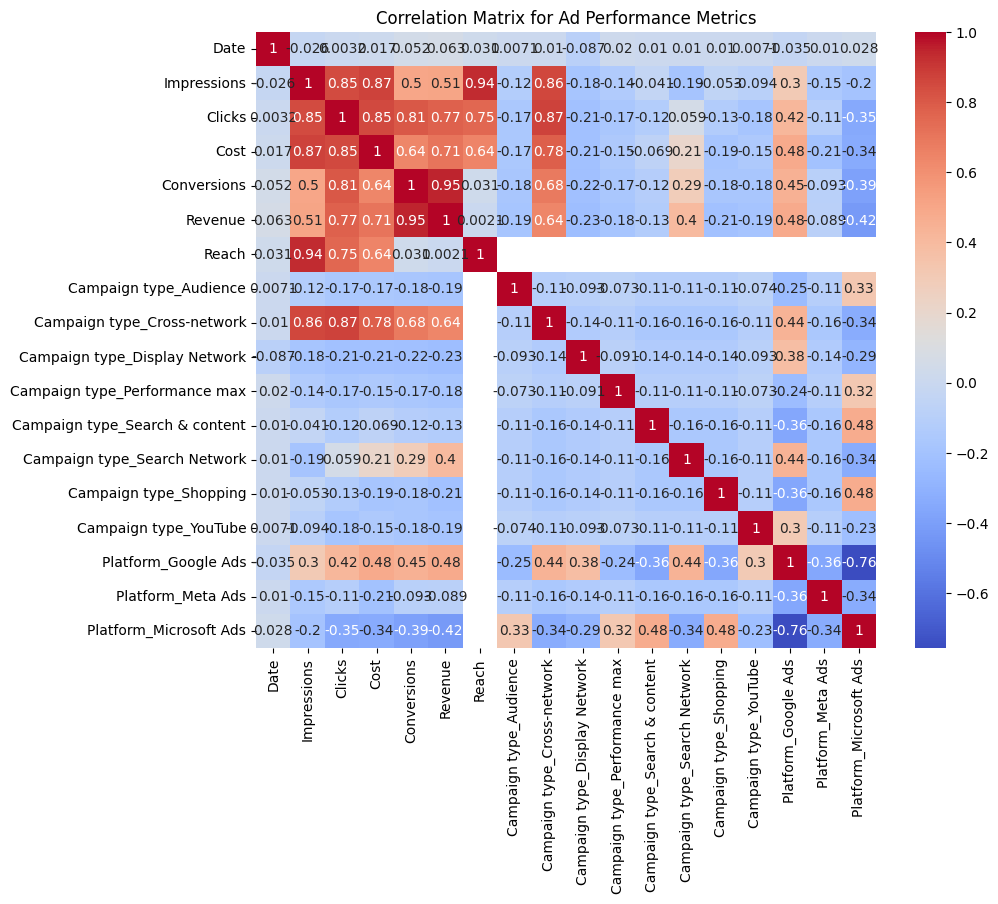

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Ad Performance Metrics')
plt.show()

#### Feature Engineering: Aggregating Data

In [ ]:
ads_data['CTR'] = ads_data['Clicks'] / ads_data['Impressions'] # Click-Through Rate
ads_data['CPC'] = ads_data['Cost'] / ads_data['Clicks'] # Cost Per Click
ads_data['CPA'] = ads_data['Cost'] / ads_data['Conversions'] # Cost Per Acquisition

In [ ]:
ads_data.replace([np.inf, -np.inf], np.nan, inplace=True)
ads_data.fillna(0, inplace=True)

#### Summarize performance by platform and campaign

In [ ]:
performance_summary = ads_data.groupby(['Platform', 'Campaign type']).agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Conversions': 'sum',
    'Revenue': 'sum'
}).reset_index()

In [ ]:
print(performance_summary)

        Platform     Campaign type  Impressions    Clicks      Cost  \
0     Google Ads     Cross-network  105764384.0  827215.0  921009.4   
1     Google Ads   Display Network     363182.0   11890.0    3009.3   
2     Google Ads    Search Network    2945690.0  240351.0  407779.5   
3     Google Ads           YouTube    3966995.0    1002.0   17191.6   
4       Meta Ads                 0    6358130.0  118486.0   41509.3   
5  Microsoft Ads          Audience    2078054.0   10966.0    4383.8   
6  Microsoft Ads   Performance max     631902.0    6972.0   10921.5   
7  Microsoft Ads  Search & content   17515017.0  110018.0  164133.6   
8  Microsoft Ads          Shopping   16294351.0  101891.0   59282.0   

   Conversions    Revenue  
0      31385.2  4941392.7  
1        108.1    18460.4  
2      18184.6  3678223.9  
3         14.3     4408.1  
4       5635.0  1026382.3  
5         55.0    14205.1  
6        120.0    16551.1  
7       4813.0   809692.2  
8       2758.0   375778.2  


#### Standardize Data

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(performance_summary[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']])

#### Apply KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
performance_summary['Cluster'] = kmeans.fit_predict(X)

#### Visualize Clusters

In [ ]:
performance_summary['Cluster'].describe()

count    9.000000
mean     0.333333
std      0.707107
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      2.000000
Name: Cluster, dtype: float64

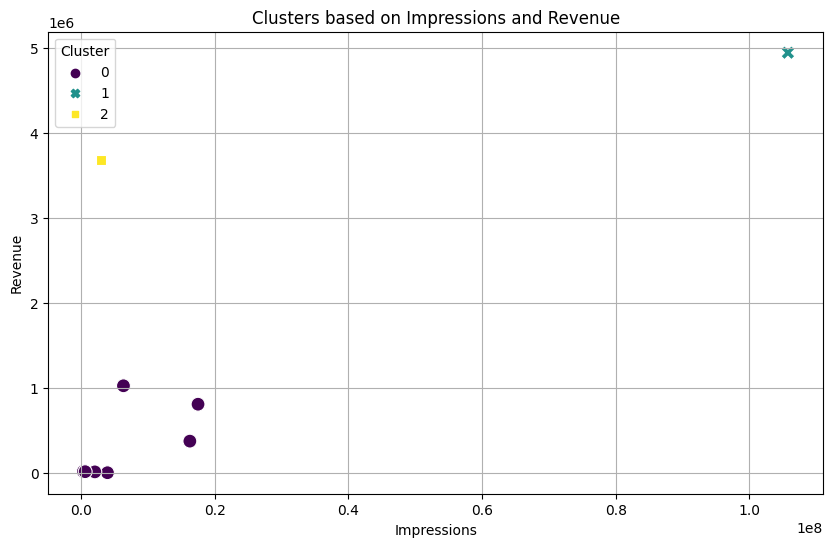

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=performance_summary,
    x='Impressions',
    y='Revenue',
    hue='Cluster',
    palette='viridis',
    style='Cluster',
    s=100,
    legend='full'
)

plt.title('Clusters based on Impressions and Revenue')
plt.xlabel('Impressions')
plt.ylabel('Revenue')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
X = ads_data[['Impressions', 'Clicks', 'Cost']]
y = ads_data['Conversions']

In [ ]:
model = LinearRegression()
model.fit(X, y)
ads_data['Predicted Conversions'] = model.predict(X)

#### Budget Reallocation Logic

In [ ]:
total_budget = 200000
min_budget_per_channel = 0.1 * total_budget

In [ ]:
# Calculate budget allocation
def allocate_budget(df, total_budget):
    df['Budget Allocation'] = (df['Predicted Conversions'] / df['Predicted Conversions'].sum()) * total_budget
    return df

In [ ]:
budget_allocation = allocate_budget(ads_data, total_budget)

In [ ]:
# Ensure minimum budget allocation constraint
def enforce_min_budget(df, min_budget):
    df.loc[df['Budget Allocation'] < min_budget, 'Budget Allocation'] = min_budget
    return df

In [ ]:
budget_allocation = enforce_min_budget(budget_allocation, min_budget_per_channel)

#### Output: Cumulated Budgets and Estimated Conversions

In [ ]:
budget_summary = budget_allocation.groupby(['Platform', 'Campaign type']).agg({
    'Budget Allocation': 'sum',
    'Predicted Conversions': 'sum'
}).reset_index()

print(budget_summary)

        Platform     Campaign type  Budget Allocation  Predicted Conversions
0     Google Ads     Cross-network          7280000.0           29242.132559
1     Google Ads   Display Network          5480000.0            1309.010179
2     Google Ads    Search Network          7280000.0           17893.111151
3     Google Ads           YouTube          3640000.0            -342.951049
4       Meta Ads                 0          7280000.0            6372.849481
5  Microsoft Ads          Audience          3640000.0             584.418966
6  Microsoft Ads   Performance max          3500000.0             787.974873
7  Microsoft Ads  Search & content          7280000.0            4218.730834
8  Microsoft Ads          Shopping          7280000.0            3007.923005


#### Visualization of Budget Allocation

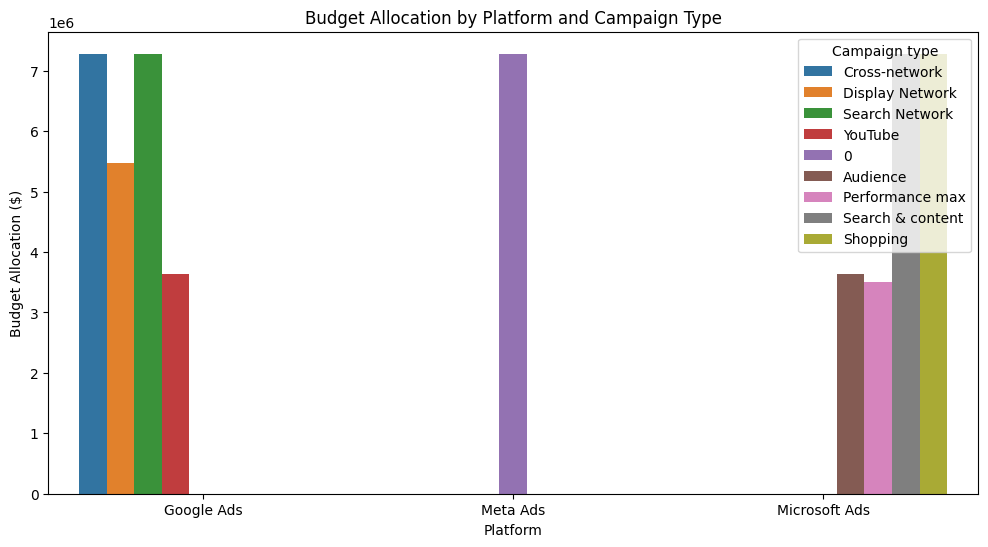

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Budget Allocation', hue='Campaign type', data=budget_summary)
plt.title('Budget Allocation by Platform and Campaign Type')
plt.xlabel('Platform')
plt.ylabel('Budget Allocation ($)')
plt.show()

#### Preparing data for modelling

In [ ]:
X = ads_data[['Impressions', 'Clicks', 'Cost', 'CTR', 'CPC']]
y = ads_data['Conversions']

In [ ]:
X.head()

,Impressions,Clicks,Cost,CTR,CPC
0,143669.0,896.0,656.3,0.006237,0.732478
1,3.0,0.0,0.0,0.000000,0.000000
2,3701.0,251.0,496.5,0.067820,1.978088
3,36211.0,8.0,115.2,0.000221,14.400000
4,183496.0,1172.0,1525.0,0.006387,1.301195


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Linear Regression - RMSE:", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("Linear Regression - R2 Score:", r2_score(y_test, lr_predictions))

Linear Regression - RMSE: 33.883761642749946
Linear Regression - R2 Score: 0.261346427305329


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest - RMSE:", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("Random Forest - R2 Score:", r2_score(y_test, rf_predictions))

Random Forest - RMSE: 10.916670348990985
Random Forest - R2 Score: 0.9233277939921125


#### Budget Allocation

In [ ]:
total_budget = 200000
min_budget_per_channel = 0.1 * total_budget

In [ ]:
def allocate_budget(df, total_budget):
    df['Budget Allocation'] = (df['Predicted Conversions'] / df['Predicted Conversions'].sum()) * total_budget
    return df

In [ ]:
budget_allocation = allocate_budget(ads_data, total_budget)

In [ ]:
def enforce_min_budget(df, min_budget):
    df.loc[df['Budget Allocation'] < min_budget, 'Budget Allocation'] = min_budget
    return df

In [ ]:

budget_allocation = enforce_min_budget(budget_allocation, min_budget_per_channel)

#### Visualization of Budget Allocation

In [ ]:
budget_summary = budget_allocation.groupby(['Platform', 'Campaign type']).agg({
    'Budget Allocation': 'sum',
    'Predicted Conversions': 'sum'
}).reset_index()

print(budget_summary)

        Platform     Campaign type  Budget Allocation  Predicted Conversions
0     Google Ads     Cross-network          7280000.0           29242.132559
1     Google Ads   Display Network          5480000.0            1309.010179
2     Google Ads    Search Network          7280000.0           17893.111151
3     Google Ads           YouTube          3640000.0            -342.951049
4       Meta Ads                 0          7280000.0            6372.849481
5  Microsoft Ads          Audience          3640000.0             584.418966
6  Microsoft Ads   Performance max          3500000.0             787.974873
7  Microsoft Ads  Search & content          7280000.0            4218.730834
8  Microsoft Ads          Shopping          7280000.0            3007.923005


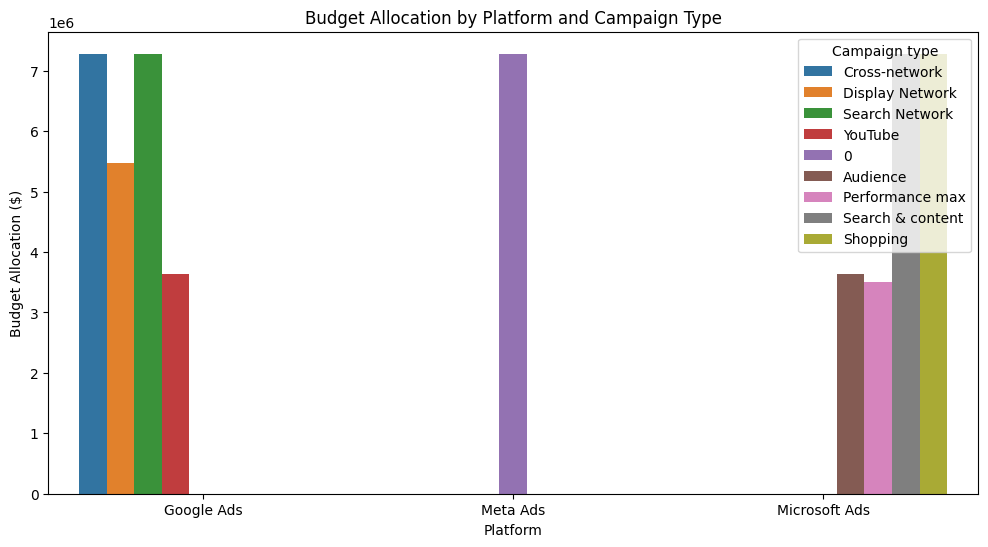

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Budget Allocation', hue='Campaign type', data=budget_summary)
plt.title('Budget Allocation by Platform and Campaign Type')
plt.xlabel('Platform')
plt.ylabel('Budget Allocation ($)')
plt.show()

#### Budget Allocation

##### Budget Allocation by user input